In [1]:
%load_ext watermark
import numpy as np
import pandas as pd

## Load the JupyterHub logs

In [2]:
columns = ['user', 'machine', 'session_start', 'session_end', 'session_length', 'log_file']

In [3]:
df = pd.read_csv("../data/jhub_logs.csv.gz", parse_dates=["session_start", "session_end"])
df["session_length"] = (df.session_end - df.session_start).dt.total_seconds().div(60)
df = df[columns]
df.head()

,user,machine,session_start,session_end,session_length,log_file
0,20d8049712498ad1e232,cheyenne,2019-10-17 09:04:13,2019-10-17 11:04:20,120.116667,3aebf8397c312169a649
1,20d8049712498ad1e232,cheyenne,2019-10-18 16:40:04,2019-10-18 16:42:08,2.066667,0af27edd1d54f8f64735
2,20d8049712498ad1e232,cheyenne,2019-10-18 11:44:28,2019-10-18 12:18:35,34.116667,044c2c11e5ebf6972a1d
3,20d8049712498ad1e232,cheyenne,2019-10-17 15:42:48,2019-10-17 15:46:53,4.083333,2055777649346c360841
4,20d8049712498ad1e232,cheyenne,2019-10-17 15:48:52,2019-10-17 15:57:59,9.116667,84be1d0c9fab13fcd4c1


## Basic Statistics

Some basic statistics from the logs.

In [4]:
print(f'Total number of sessions:  {len(df)}')

Total number of sessions:  6477


In [5]:
print(f'Total span of logs:  {df.session_end.max() - df.session_start.min()}')
print(f'   From: {df.session_start.min()}')
print(f'   To:   {df.session_end.max()}')

Total span of logs:  255 days 23:00:58
   From: 2019-05-21 16:49:20
   To:   2020-02-01 15:50:18


In [6]:
print(f'Session Lengths [minutes]:')
print(f'   Minimum:  {df.session_length.min()}')
print(f'   Maximum:  {df.session_length.max()}')
print(f'   Mean:     {df.session_length.mean()}')
print(f'   Median:   {df.session_length.median()}')

Session Lengths [minutes]:
   Minimum:  0.0
   Maximum:  2494.6
   Mean:     113.3139051883879
   Median:   118.5


In [7]:
print(f'Number of Unique Users:  {df.user.nunique()}')

Number of Unique Users:  180


## Tutorials

Three tutorials have been given during the duration of the logs.  We note the dates for these tutorials so that we can reference their times in the plots below.

In [8]:
tutorials = {'jun': ["2019-06-03", "2019-06-05"],
             'sep': ["2019-09-18", "2019-09-20"],
             'oct': ["2019-10-16", "2019-10-18"]}

## Sessions by Day & Month

First, we take a look at the number of sessions per day over the span of the logs.

In [9]:
days = pd.date_range(df.session_start.min(),
                     df.session_end.max() + pd.DateOffset(days=1),
                     freq='D').normalize()
mons = pd.date_range(df.session_start.min() - pd.DateOffset(months=1),
                     df.session_end.max() + pd.DateOffset(months=1),
                     freq='MS').normalize()

In [10]:
sess_per_day = 0.5 * (df.groupby(pd.cut(df.session_start, days)).size() +
                      df.groupby(pd.cut(df.session_end, days)).size()).rename('Sessions per Day')
sess_per_mon = 0.5 * (df.groupby(pd.cut(df.session_start, mons)).size() +
                      df.groupby(pd.cut(df.session_end, mons)).size()).rename('Sessions per Month')

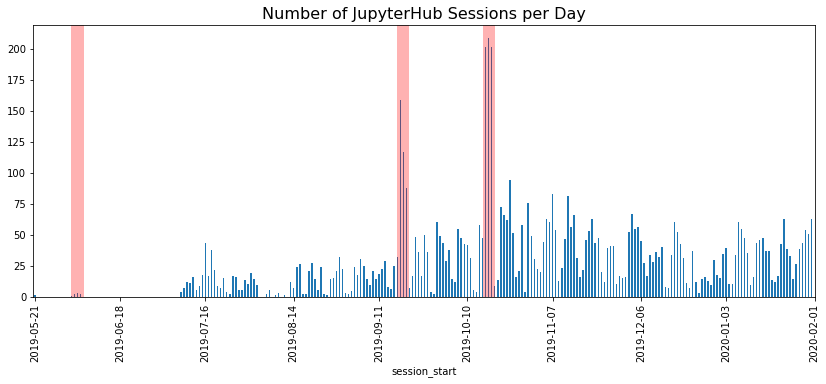

In [11]:
ax = sess_per_day.plot.bar(figsize=(14,5))
xticks = np.linspace(0, len(days)-1, 10, dtype=int)
ax.set_xticks(xticks)
ax.set_xticklabels([days[i].strftime('%Y-%m-%d') for i in xticks])
ax.set_title('Number of JupyterHub Sessions per Day', fontsize=16)
for tutorial in tutorials:
    t1, t2 = tutorials[tutorial]
    ax.axvspan(days.get_loc(t1)-1, days.get_loc(t2)+1, facecolor='r', alpha=.3, edgecolor='none')

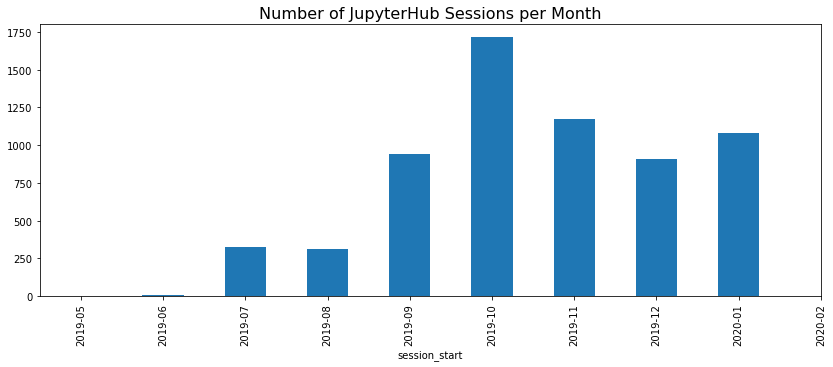

In [12]:
ax = sess_per_mon.plot.bar(figsize=(14,5))
xticks = np.linspace(0, len(mons)-1, 10, dtype=int)
ax.set_xticks(xticks)
ax.set_xticklabels([mons[i].strftime('%Y-%m') for i in xticks])
ax.set_title('Number of JupyterHub Sessions per Month', fontsize=16);

**NOTE:** You can see a definite up-tick in the number of sessions following the September and October tutorials.  During this period of time, from August through October, the average number of sessions per day and month more than doubles.

## Unique Users by Day & Month

Next, we look at the number of unique users per day and per month.

In [13]:
users_per_day = 0.5 * (df.user.groupby(pd.cut(df.session_start, days)).nunique() +
                       df.user.groupby(pd.cut(df.session_end, days)).nunique()).rename('Unique Users per Day')
users_per_mon = 0.5 * (df.user.groupby(pd.cut(df.session_start, mons)).nunique() +
                       df.user.groupby(pd.cut(df.session_end, mons)).nunique()).rename('Unique Users per Month')

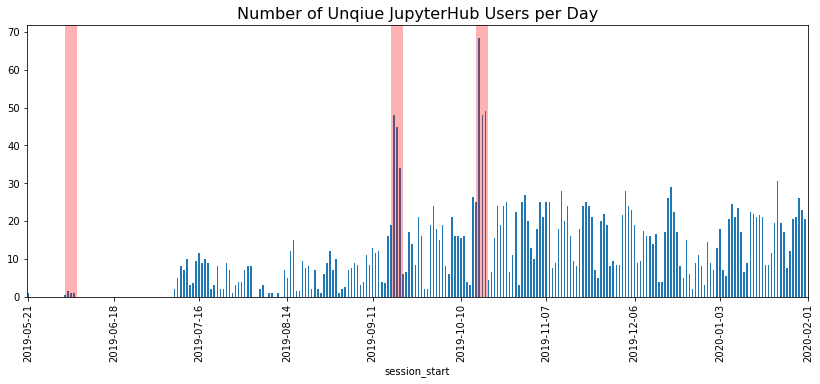

In [14]:
ax = users_per_day.plot.bar(figsize=(14,5))
xticks = np.linspace(0, len(days)-1, 10, dtype=int)
ax.set_xticks(xticks)
ax.set_xticklabels([days[i].strftime('%Y-%m-%d') for i in xticks])
ax.set_title('Number of Unqiue JupyterHub Users per Day', fontsize=16)
for tutorial in tutorials:
    t1, t2 = tutorials[tutorial]
    ax.axvspan(days.get_loc(t1)-1, days.get_loc(t2)+1, facecolor='r', alpha=.3, edgecolor='none')

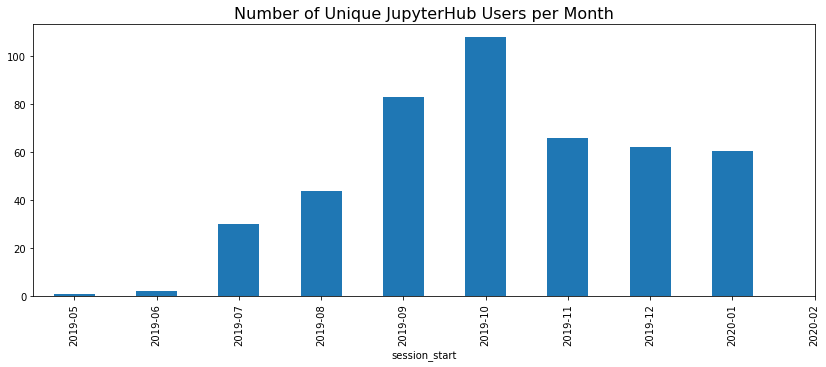

In [15]:
ax = users_per_mon.plot.bar(figsize=(14,5))
xticks = np.linspace(0, len(mons)-1, 10, dtype=int)
ax.set_xticks(xticks)
ax.set_xticklabels([mons[i].strftime('%Y-%m') for i in xticks])
ax.set_title('Number of Unique JupyterHub Users per Month', fontsize=16);

**NOTE:** Again, you can note a growth in users following each tutorial/hackathon (September and October).  

In [16]:
%watermark -iv -d -u

pandas 1.0.1
numpy  1.18.1
last updated: 2020-02-13
